In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

pd.set_option('display.max_columns', None) #remove upper limit on the number of columns to display

In [2]:
#load data
data = pd.read_csv('house_train.csv')
test_data = pd.read_csv('house_test.csv')
transaction_id_test = test_data['TRANSACTION_ID']
data_mean_sqm_price = data.groupby("MUNICIPALITY_CODE")["SQM_PRICE"].mean()
data["MUNICIPALITY_MEAN_SQM_PRICE"] = data.apply(
    lambda row: data_mean_sqm_price[row["MUNICIPALITY_CODE"]],
    axis=1
)
test_data["MUNICIPALITY_MEAN_SQM_PRICE"] = test_data.apply(
    lambda row: data_mean_sqm_price[row["MUNICIPALITY_CODE"]],
    axis=1
)

data['PRICE'] = np.log(data['PRICE'])
test_data['PRICE'] = np.log(test_data['PRICE'])

data
test_data


,TRANSACTION_ID,BUILDING_ID,UNIT_ID,FLOOR,MUNICIPALITY_CODE,ZIP_CODE,STREET_CODE,TRADE_DATE,PRICE,SQM_PRICE,CONSTRUCTION_YEAR,REBUILDING_YEAR,AREA_TINGLYST,AREA_RESIDENTIAL,AREA_OTHER,AREA_COMMON_ACCESS_SHARE,AREA_CLOSED_COVER_OUTHOUSE,AREA_OPEN_BALCONY_ROOFTOP,NUMBER_ROOMS,FACILITIES_TOILET,FACILITIES_SHOWER,FACILITIES_KITCHEN,HAS_ELEVATOR,LNG,LAT,DISTANCE_LAKE,DISTANCE_HARBOUR,DISTANCE_COAST,MUNICIPALITY_MEAN_SQM_PRICE
0,f22f66a6-eda2-d049-ea24-09df907e8f38,cf96cec5-f3c6-1b52-6784-c3a25647f8b2,24e6b3bb-29b2-3a1e-7548-622f9c086a08,2,265,4000.0,2656573.0,2024-10-06,NaN,NaN,1962.0,1998.0,71,76,NaN,NaN,NaN,NaN,3,T: Vandskyllende toilet i enheden,V: Badeværelser i enheden,E: Eget køkken med afløb,False,12.094847,55.627949,1415.2,2613.7,2612.8,26822.223099
1,c8cb2732-203f-3b00-4b2b-78ea45ebb5b2,4495a41f-561b-06db-b33c-384a1a83b158,41c02eab-2b4a-3a43-1c92-7dca8398cf54,2,187,2625.0,187106.0,2024-10-04,NaN,NaN,1964.0,NaN,63,68,NaN,NaN,NaN,NaN,2,T: Vandskyllende toilet i enheden,V: Badeværelser i enheden,E: Eget køkken med afløb,False,12.354648,55.652842,871.7,4984.9,4886.3,22081.724044
2,c8f1227e-762c-995d-1315-89bc66f6a9d3,d1a02511-53e8-98e0-55a6-db15d7a71745,3e16a170-88da-794c-d4e6-fe3a218cc33e,3,101,2150.0,1011882.0,2024-10-04,NaN,NaN,2017.0,NaN,69,83,NaN,NaN,NaN,13.0,3,T: Vandskyllende toilet i enheden,V: Badeværelser i enheden,E: Eget køkken med afløb,True,12.598294,55.708251,637.8,23.0,70.3,43109.941311
3,504eb7fd-becf-b3c3-9cc9-53492c7b4bcc,ac0d66d6-3a0a-1cf8-3075-7f9f0dd3e275,c00f9c8a-6cf2-63a9-6c42-a9370bc963ef,3,101,2200.0,101508.0,2024-10-03,NaN,NaN,1892.0,NaN,45,52,NaN,NaN,NaN,5.0,2,T: Vandskyllende toilet i enheden,C: Adgang til badeværelse,E: Eget køkken med afløb,False,12.558023,55.690497,453.1,1935.4,2573.5,43109.941311
4,a1a89478-d718-4df0-cc6c-bec4ef109e19,0e3f916c-85b8-c9bb-5517-18814f1efd8d,366333f0-a55f-4efd-1a7f-90c234b52d5a,2,153,2605.0,15371.0,2024-10-03,NaN,NaN,1967.0,NaN,43,46,NaN,NaN,NaN,NaN,2,T: Vandskyllende toilet i enheden,V: Badeværelser i enheden,E: Eget køkken med afløb,False,12.409968,55.657729,1569.5,4906.3,4983.6,24220.261411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3eb63142-1df6-79b1-cb69-c78368f46302,48613d71-0d06-3c36-5efd-9e579638acb0,0d87ffc9-41d7-799b-c6ff-f9b0b0b09bc1,st,167,2650.0,167836.0,2015-01-04,NaN,NaN,2007.0,NaN,68,75,NaN,NaN,NaN,NaN,2,T: Vandskyllende toilet i enheden,V: Badeværelser i enheden,E: Eget køkken med afløb,False,12.491772,55.634532,2341.2,1041.3,840.6,26194.995401
4996,b1118c06-b757-9543-6663-c0cb24456524,fd372529-bec3-1611-205b-b3d90b78fb8a,44fba29c-154b-64f6-fcb5-d294372c5d48,2,730,8900.0,7302545.0,2015-01-02,NaN,NaN,1948.0,2003.0,126,142,NaN,NaN,NaN,NaN,4,T: Vandskyllende toilet i enheden,V: Badeværelser i enheden,E: Eget køkken med afløb,False,10.041323,56.459512,1005.6,101.8,347.1,11984.072165
4997,4618d1c9-020a-039c-a5d2-d766a52bfa59,7c32d81e-32c6-21bc-884d-5f92d4a8cb63,e852d1d6-904a-c3f4-8d1f-4662b775cb54,st,101,2700.0,1013480.0,2015-01-02,NaN,NaN,1938.0,NaN,66,71,NaN,5.0,NaN,NaN,2,T: Vandskyllende toilet i enheden,V: Badeværelser i enheden,E: Eget køkken med afløb,False,12.490083,55.706564,361.3,5892.8,6017.2,43109.941311
4998,dc6c8ba2-251c-04c1-7f96-e2aad2559240,3537bd5b-1678-4e5d-6944-81366fb72b89,40a819a0-78e0-6193-7f83-08d83c03a76c,2,101,2720.0,1012264.0,2015-01-01,NaN,NaN,1977.0,NaN,81,92,NaN,NaN,NaN,NaN,3,T: Vandskyllende toilet i enheden,V: Badeværelser i enheden,E: Eget køkken med afløb,False,12.510656,55.694052,1751.5,4565.6,4999.0,43109.941311


In [3]:
#introduce street mean sqm price
street_mean_sqm_price = data.groupby("STREET_CODE")["SQM_PRICE"].mean()

data["STREET_CODE_MEAN_SQM_PRICE"] = data["STREET_CODE"].map(street_mean_sqm_price)
test_data["STREET_CODE_MEAN_SQM_PRICE"] = test_data["STREET_CODE"].map(street_mean_sqm_price)

data["STREET_CODE_MEAN_SQM_PRICE"].fillna(data["SQM_PRICE"].mean(), inplace=True)
test_data["STREET_CODE_MEAN_SQM_PRICE"].fillna(data["SQM_PRICE"].mean(), inplace=True)

data
test_data

C:\Users\benja\AppData\Local\Temp\ipykernel_11728\1140056410.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["STREET_CODE_MEAN_SQM_PRICE"].fillna(data["SQM_PRICE"].mean(), inplace=True)
C:\Users\benja\AppData\Local\Temp\ipykernel_11728\1140056410.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

,TRANSACTION_ID,BUILDING_ID,UNIT_ID,FLOOR,MUNICIPALITY_CODE,ZIP_CODE,STREET_CODE,TRADE_DATE,PRICE,SQM_PRICE,CONSTRUCTION_YEAR,REBUILDING_YEAR,AREA_TINGLYST,AREA_RESIDENTIAL,AREA_OTHER,AREA_COMMON_ACCESS_SHARE,AREA_CLOSED_COVER_OUTHOUSE,AREA_OPEN_BALCONY_ROOFTOP,NUMBER_ROOMS,FACILITIES_TOILET,FACILITIES_SHOWER,FACILITIES_KITCHEN,HAS_ELEVATOR,LNG,LAT,DISTANCE_LAKE,DISTANCE_HARBOUR,DISTANCE_COAST,MUNICIPALITY_MEAN_SQM_PRICE,STREET_CODE_MEAN_SQM_PRICE
0,f22f66a6-eda2-d049-ea24-09df907e8f38,cf96cec5-f3c6-1b52-6784-c3a25647f8b2,24e6b3bb-29b2-3a1e-7548-622f9c086a08,2,265,4000.0,2656573.0,2024-10-06,NaN,NaN,1962.0,1998.0,71,76,NaN,NaN,NaN,NaN,3,T: Vandskyllende toilet i enheden,V: Badeværelser i enheden,E: Eget køkken med afløb,False,12.094847,55.627949,1415.2,2613.7,2612.8,26822.223099,25159.541420
1,c8cb2732-203f-3b00-4b2b-78ea45ebb5b2,4495a41f-561b-06db-b33c-384a1a83b158,41c02eab-2b4a-3a43-1c92-7dca8398cf54,2,187,2625.0,187106.0,2024-10-04,NaN,NaN,1964.0,NaN,63,68,NaN,NaN,NaN,NaN,2,T: Vandskyllende toilet i enheden,V: Badeværelser i enheden,E: Eget køkken med afløb,False,12.354648,55.652842,871.7,4984.9,4886.3,22081.724044,18654.296053
2,c8f1227e-762c-995d-1315-89bc66f6a9d3,d1a02511-53e8-98e0-55a6-db15d7a71745,3e16a170-88da-794c-d4e6-fe3a218cc33e,3,101,2150.0,1011882.0,2024-10-04,NaN,NaN,2017.0,NaN,69,83,NaN,NaN,NaN,13.0,3,T: Vandskyllende toilet i enheden,V: Badeværelser i enheden,E: Eget køkken med afløb,True,12.598294,55.708251,637.8,23.0,70.3,43109.941311,59125.474359
3,504eb7fd-becf-b3c3-9cc9-53492c7b4bcc,ac0d66d6-3a0a-1cf8-3075-7f9f0dd3e275,c00f9c8a-6cf2-63a9-6c42-a9370bc963ef,3,101,2200.0,101508.0,2024-10-03,NaN,NaN,1892.0,NaN,45,52,NaN,NaN,NaN,5.0,2,T: Vandskyllende toilet i enheden,C: Adgang til badeværelse,E: Eget køkken med afløb,False,12.558023,55.690497,453.1,1935.4,2573.5,43109.941311,55779.191489
4,a1a89478-d718-4df0-cc6c-bec4ef109e19,0e3f916c-85b8-c9bb-5517-18814f1efd8d,366333f0-a55f-4efd-1a7f-90c234b52d5a,2,153,2605.0,15371.0,2024-10-03,NaN,NaN,1967.0,NaN,43,46,NaN,NaN,NaN,NaN,2,T: Vandskyllende toilet i enheden,V: Badeværelser i enheden,E: Eget køkken med afløb,False,12.409968,55.657729,1569.5,4906.3,4983.6,24220.261411,22869.171717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3eb63142-1df6-79b1-cb69-c78368f46302,48613d71-0d06-3c36-5efd-9e579638acb0,0d87ffc9-41d7-799b-c6ff-f9b0b0b09bc1,st,167,2650.0,167836.0,2015-01-04,NaN,NaN,2007.0,NaN,68,75,NaN,NaN,NaN,NaN,2,T: Vandskyllende toilet i enheden,V: Badeværelser i enheden,E: Eget køkken med afløb,False,12.491772,55.634532,2341.2,1041.3,840.6,26194.995401,30667.000000
4996,b1118c06-b757-9543-6663-c0cb24456524,fd372529-bec3-1611-205b-b3d90b78fb8a,44fba29c-154b-64f6-fcb5-d294372c5d48,2,730,8900.0,7302545.0,2015-01-02,NaN,NaN,1948.0,2003.0,126,142,NaN,NaN,NaN,NaN,4,T: Vandskyllende toilet i enheden,V: Badeværelser i enheden,E: Eget køkken med afløb,False,10.041323,56.459512,1005.6,101.8,347.1,11984.072165,12027.901099
4997,4618d1c9-020a-039c-a5d2-d766a52bfa59,7c32d81e-32c6-21bc-884d-5f92d4a8cb63,e852d1d6-904a-c3f4-8d1f-4662b775cb54,st,101,2700.0,1013480.0,2015-01-02,NaN,NaN,1938.0,NaN,66,71,NaN,5.0,NaN,NaN,2,T: Vandskyllende toilet i enheden,V: Badeværelser i enheden,E: Eget køkken med afløb,False,12.490083,55.706564,361.3,5892.8,6017.2,43109.941311,28864.932432
4998,dc6c8ba2-251c-04c1-7f96-e2aad2559240,3537bd5b-1678-4e5d-6944-81366fb72b89,40a819a0-78e0-6193-7f83-08d83c03a76c,2,101,2720.0,1012264.0,2015-01-01,NaN,NaN,1977.0,NaN,81,92,NaN,NaN,NaN,NaN,3,T: Vandskyllende toilet i enheden,V: Badeværelser i enheden,E: Eget køkken med afløb,False,12.510656,55.694052,1751.5,4565.6,4999.0,43109.941311,32470.030303


In [4]:
#Generates a report for exploratory data analysis and saves it to the folder containing this script
import os
from ydata_profiling import ProfileReport
if not os.path.isfile("train_data_report.html"):
    profile_report = ProfileReport(df=data)
    profile_report.to_file("train_data_report.html")

Reading through the report, the main points are:

We have 19 numeric variables, 1 datetime, 1 boolean, 3 text and 4 categorial (28 in total). There's no duplicate data. Approximately 16.2% of the cells are missing.

For ML purposes, we will ignore the following variables (for now):
Transaction id
Building id
Unit id
Longitude
Latitude





In [5]:
def clean_data(data):
    columns_to_drop = ["TRANSACTION_ID", "BUILDING_ID", "UNIT_ID", "SQM_PRICE", "MUNICIPALITY_CODE"]
    try: 
        data = data.drop(columns=columns_to_drop)
    except KeyError:
        pass #error occurs if columns have already been dropped
    
    #For the columns with many missing values, we replace the empty values by the median of the column
    columns_to_fill_missing_values = ["REBUILDING_YEAR", "AREA_OTHER", "AREA_COMMON_ACCESS_SHARE", "AREA_CLOSED_COVER_OUTHOUSE", "AREA_OPEN_BALCONY_ROOFTOP", "ZIP_CODE", "STREET_CODE", "CONSTRUCTION_YEAR"]
    for column in columns_to_fill_missing_values:
        data[column] = data[column].fillna(data[column].median())
    
    data["FLOOR"] = data["FLOOR"].fillna("na")

    #For the columns missing a few values, we choose to drop those few lines (we have plenty of data to work with)
    print(data.isnull().sum(axis = 0))

    # handle datetime and convert it to year
    data['TRADE_DATE'] = pd.to_datetime(data['TRADE_DATE'])
    data['YEAR'] = data['TRADE_DATE'].dt.year
    data['MONTH'] = data['TRADE_DATE'].dt.month
    
    data['TIME_SINCE_CONSTRUCTION'] = data['TRADE_DATE'].dt.year - data['CONSTRUCTION_YEAR']
    data = data.drop(columns=['TRADE_DATE'])
    return data

data = clean_data(data)
test_data = clean_data(test_data)

FLOOR                          0
ZIP_CODE                       0
STREET_CODE                    0
TRADE_DATE                     0
PRICE                          0
CONSTRUCTION_YEAR              0
REBUILDING_YEAR                0
AREA_TINGLYST                  0
AREA_RESIDENTIAL               0
AREA_OTHER                     0
AREA_COMMON_ACCESS_SHARE       0
AREA_CLOSED_COVER_OUTHOUSE     0
AREA_OPEN_BALCONY_ROOFTOP      0
NUMBER_ROOMS                   0
FACILITIES_TOILET              0
FACILITIES_SHOWER              0
FACILITIES_KITCHEN             0
HAS_ELEVATOR                   0
LNG                            0
LAT                            0
DISTANCE_LAKE                  0
DISTANCE_HARBOUR               0
DISTANCE_COAST                 0
MUNICIPALITY_MEAN_SQM_PRICE    0
STREET_CODE_MEAN_SQM_PRICE     0
dtype: int64
FLOOR                             0
ZIP_CODE                          0
STREET_CODE                       0
TRADE_DATE                        0
PRICE             

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data.head()
def scale_data(train_data, test_data):
    #we scale all non-binary features to improve model performance
    #we don't normalize price, since that's our y to predict
    standard_scaler = StandardScaler()
    columns_to_feature_scale = ["YEAR", "MONTH", "STREET_CODE_MEAN_SQM_PRICE", "TIME_SINCE_CONSTRUCTION", "MUNICIPALITY_MEAN_SQM_PRICE", "CONSTRUCTION_YEAR", "REBUILDING_YEAR", "AREA_TINGLYST", "AREA_RESIDENTIAL", "AREA_OTHER", "AREA_COMMON_ACCESS_SHARE", "AREA_CLOSED_COVER_OUTHOUSE", "AREA_OPEN_BALCONY_ROOFTOP", "NUMBER_ROOMS", "DISTANCE_LAKE", "DISTANCE_HARBOUR", "DISTANCE_COAST"]

    train_data[columns_to_feature_scale] = standard_scaler.fit_transform(train_data[columns_to_feature_scale])
    test_data[columns_to_feature_scale] = standard_scaler.transform(test_data[columns_to_feature_scale])
    
    train_data['FLOOR'] = train_data['FLOOR'].apply(lambda x: '3' if x.isdigit() and int(x) > 3 else x)
    test_data['FLOOR'] = test_data['FLOOR'].apply(lambda x: '3' if x.isdigit() and int(x) > 3 else x)

    encoder = OneHotEncoder(drop='first', sparse_output=False)
    train_encoded = encoder.fit_transform(train_data[['FLOOR', 'FACILITIES_TOILET', 'FACILITIES_SHOWER', 'FACILITIES_KITCHEN']])
    test_encoded = encoder.transform(test_data[['FLOOR', 'FACILITIES_TOILET', 'FACILITIES_SHOWER', 'FACILITIES_KITCHEN']])

    train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out())
    test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out())

    train_data = pd.concat([train_data.reset_index(drop=True), train_encoded_df.reset_index(drop=True)], axis=1)
    test_data = pd.concat([test_data.reset_index(drop=True), test_encoded_df.reset_index(drop=True)], axis=1)

    train_data = train_data.drop(columns=['FLOOR', 'FACILITIES_TOILET', 'FACILITIES_SHOWER', 'FACILITIES_KITCHEN'])
    test_data = test_data.drop(columns=['FLOOR', 'FACILITIES_TOILET', 'FACILITIES_SHOWER', 'FACILITIES_KITCHEN'])
    
    train_data = train_data.drop(columns=['ZIP_CODE', 'STREET_CODE',], errors='ignore')
    test_data = test_data.drop(columns=['ZIP_CODE', 'STREET_CODE'], errors='ignore')

    return train_data, test_data

data, test_data = scale_data(data, test_data)

#show top 5 rows
data.head()


,PRICE,CONSTRUCTION_YEAR,REBUILDING_YEAR,AREA_TINGLYST,AREA_RESIDENTIAL,AREA_OTHER,AREA_COMMON_ACCESS_SHARE,AREA_CLOSED_COVER_OUTHOUSE,AREA_OPEN_BALCONY_ROOFTOP,NUMBER_ROOMS,HAS_ELEVATOR,LNG,LAT,DISTANCE_LAKE,DISTANCE_HARBOUR,DISTANCE_COAST,MUNICIPALITY_MEAN_SQM_PRICE,STREET_CODE_MEAN_SQM_PRICE,YEAR,MONTH,TIME_SINCE_CONSTRUCTION,FLOOR_2,FLOOR_3,FLOOR_kl,FLOOR_na,FLOOR_st,FACILITIES_TOILET_B: Intet vandskyllende toilet,FACILITIES_TOILET_T: Vandskyllende toilet i enheden,FACILITIES_SHOWER_D: Hverken badeværelse eller adgang til badeværelse,FACILITIES_SHOWER_V: Badeværelser i enheden,FACILITIES_KITCHEN_F: Adgang til fælles køkken,FACILITIES_KITCHEN_G: Fast kogeinstallation i værelse eller på gang,FACILITIES_KITCHEN_H: Ingen fast kogeinstallation
0,15.250595,0.321784,0.069108,0.532912,0.615859,-0.055133,-0.033663,-0.005372,-0.270200,0.237836,False,12.522463,55.692823,0.272304,0.365470,0.222343,1.265248,0.297865,1.849094,-0.08305,-0.215575,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,15.046612,1.416627,0.069108,-0.722708,-0.532459,-0.055133,-0.033663,-0.005372,-0.128133,0.237836,True,12.556716,55.652070,-0.355159,-0.663611,-0.628456,0.925935,1.598902,1.849094,-0.08305,-1.309531,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,15.237413,-0.472514,-3.205841,-0.244377,-0.222103,-0.055133,-0.033663,-0.005372,-0.128133,0.237836,False,12.529022,55.691044,0.192585,0.242152,0.161167,1.265248,0.883969,1.849094,-0.08305,0.578080,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,14.601693,0.514992,0.069108,0.712286,0.460681,-0.055133,-0.033663,-0.005372,-0.128133,1.222516,False,12.492201,55.911679,0.615676,0.303946,-0.298599,-1.415407,-1.234327,1.849094,-0.08305,-0.408626,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,14.253765,-1.009201,-1.624831,0.383433,-0.097960,-0.055133,0.583210,-0.005372,-0.128133,0.237836,False,10.371957,55.395950,1.807750,-0.329146,-0.342923,-1.103059,-0.956726,1.849094,-0.08305,1.114333,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [7]:
y_train = data["PRICE"]
X_train = data.drop(["PRICE"], axis=1)
y_test = test_data["PRICE"]
X_test = test_data.drop(["PRICE"], axis=1)
train_nan_counts = X_train.isnull().sum()
test_nan_counts = X_test.isnull().sum()

# Display columns with NaN counts greater than 0
print(train_nan_counts[train_nan_counts > 0])
print(test_nan_counts[test_nan_counts > 0])

#imports we'll need
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn import metrics

#First we try out a linear regression model as a start
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

pred = lin_model.predict(X_test)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
cross_validate(lin_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=False)


Series([], dtype: int64)
Series([], dtype: int64)


{'fit_time': array([0.23492503, 0.27773857, 0.25698972, 0.33175278, 0.31853867]),
 'score_time': array([0.00999975, 0.0215497 , 0.00645971, 0.00948143, 0.00899673]),
 'test_neg_mean_absolute_error': array([-0.16867294, -0.16392723, -0.14722774, -0.15476017, -0.17025426]),
 'test_neg_mean_squared_error': array([-0.05791642, -0.04518976, -0.04117433, -0.04393354, -0.05423865]),
 'test_r2': array([0.86090316, 0.88986935, 0.88626109, 0.8782168 , 0.84331204])}

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, VotingRegressor, StackingRegressor

#Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

random_forest_model = RandomForestRegressor(n_estimators=400,
                                            max_depth=25,
                                            n_jobs=-1)
random_forest_model.fit(X_train, y_train)

pred = random_forest_model.predict(X_test)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']

mae = np.mean(np.abs(pred - y_test))
print(f'Mean Absolute Error: {mae:.4f}')

KeyboardInterrupt: 

In [ ]:
from xgboost import XGBRegressor
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=400,
                                            max_depth=25,
                                            n_jobs=-1, random_state=42)),
    ('gb', XGBRegressor(max_depth=10,               # Adjust max depth as needed
    learning_rate=0.1,            # Typical learning rate for XGBoost
    n_estimators=900,             # Same number of estimators as in Random Forest
    objective='reg:squarederror', # For regression tasks
    subsample=0.8,                # Helps with generalization
    colsample_bytree=0.8,         # Similar to max_features in Random Forest
    n_jobs=-1,eval_metric="rmse"                     # Use all available CPU cores
))
]

meta_model = LinearRegression()
print("a")
# Step 4: Create a Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_learners, final_estimator=meta_model)
print("a")

# Step 5: Fit the stacking model
stacking_regressor.fit(X_train, y_train)
print("a")

# Step 6: Make predictions
pred = stacking_regressor.predict(X_test)


a
a
a


Epoch 1/100


c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2144/2144 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5779 - mae: 0.3668 - val_loss: 0.0836 - val_mae: 0.2332
Epoch 2/100
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0441 - mae: 0.1568 - val_loss: 0.0427 - val_mae: 0.1603
Epoch 3/100
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0430 - mae: 0.1575 - val_loss: 0.1009 - val_mae: 0.2684
Epoch 4/100
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0396 - mae: 0.1467 - val_loss: 0.0630 - val_mae: 0.1956
Epoch 5/100
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0377 - mae: 0.1446 - val_loss: 0.0368 - val_mae: 0.1355
Epoch 6/100
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0344 - mae: 0.1376 - val_loss: 0.0320 - val_mae: 0.1287
Epoch 7/100
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0352 - mae: 0.1380 - val_loss: 0.0358 - val_mae: 0.1398
Epoch 8/100
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0321 - mae: 0.1318 - val_loss: 0.0324 - val_mae: 0.1262
Epoch 9/100
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 3

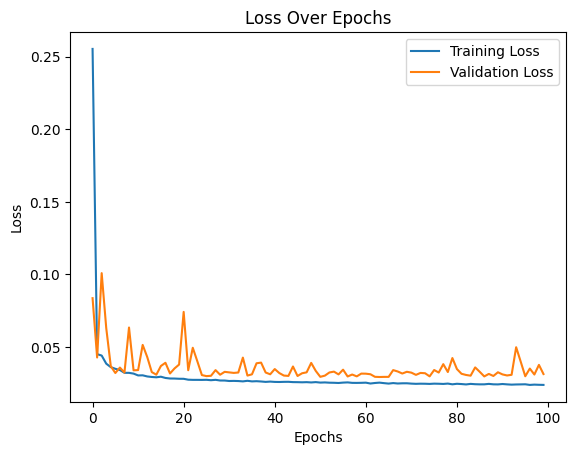

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
import tensorflow as tf
from keras import layers, models
from keras import callbacks
from keras import optimizers

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Define the model
model = models.Sequential([
    layers.Dense(256*2, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(128*2, activation="relu"),    
    layers.Dense(64*2, activation="relu"),

    layers.Dense(1, activation="linear")  # Output layer
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])  # Using MSE for regression
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[])
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}')

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
pred = model.predict(X_test)
model.save('price_prediction_model.h5')



In [ ]:
Epoch 41/100
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 2s 722us/step - loss: 507624292352.0000 - mae: 387657.0625 - val_loss: 344324276224.0000 - val_mae: 350850.3125
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: nan - mae: nan

2144/2144 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 346123403264.0000 - mae: 333479.9375 - val_loss: 253375348736.0000 - val_mae: 277587.5000
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: nan - mae: nan
Test Loss: nan, Test MAE: nan

1072/1072 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 306557583360.0000 - mae: 319935.8438 - val_loss: 252989898752.0000 - val_mae: 290720.5000

2144/2144 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 289081262080.0000 - mae: 309443.8750 - val_loss: 243394215936.0000 - val_mae: 269802.9375
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0241 - mae: 0.1112 - val_loss: 0.0314 - val_mae: 0.1234


In [ ]:
#imports we'll need
from sklearn.model_selection import cross_validate
from sklearn.ensemble import HistGradientBoostingRegressor

#First we try out a linear regression model as a start
random_forest_model = HistGradientBoostingRegressor(min_samples_leaf=20,
                                                    max_iter=500,
                                                    max_depth=30,
                                                    learning_rate=0.1,
                                                    l2_regularization=1)
random_forest_model.fit(X_train, y_train)

pred = random_forest_model.predict(X_test)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
cross_validate(lin_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=False)


c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


{'fit_time': array([0.14441276, 0.107517  , 0.11541557, 0.11001348, 0.11019921]),
 'score_time': array([0.00769401, 0.00698066, 0.00600743, 0.00803828, 0.00775433]),
 'test_neg_mean_absolute_error': array([-0.16867294, -0.16392723, -0.14722774, -0.15476017, -0.17025426]),
 'test_neg_mean_squared_error': array([-0.05791642, -0.04518976, -0.04117433, -0.04393354, -0.05423865]),
 'test_r2': array([0.86090316, 0.88986935, 0.88626109, 0.8782168 , 0.84331204])}

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

n_samples = 80000
random_indices = np.random.choice(X_train.shape[0], size=n_samples, replace=False)

# Reset indices for random sampling
X_train_reset = X_train.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

X_train_subset = X_train_reset.iloc[random_indices]
y_train_subset = y_train_reset.iloc[random_indices]

# Define the HistGradientBoostingRegressor model
model = HistGradientBoostingRegressor()

# Define the parameter distribution for HistGradientBoostingRegressor
param_distributions = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.25, 0.3],
    'max_iter': [100, 200, 300, 500, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_leaf': [20, 50, 100],
    'l2_regularization': [0, 0.1, 1]
}

# Set up RandomizedSearchCV for tuning
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=30,
    cv=3,
    verbose=1,
    n_jobs=-1,
    )

# Fit the model on the subset
random_search.fit(X_train_subset, y_train_subset)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


KeyboardInterrupt: 

In [67]:
from sklearn.model_selection import cross_validate
from xgboost import XGBRegressor

xgboost_model = XGBRegressor(max_depth=10,               #Adjust max depth as needed
    learning_rate=0.08,            #Typical learning rate for XGBoost
    n_estimators=840,             #Same number of estimators as in Random Forest
    objective='reg:squarederror', #For regression tasks
    subsample=0.8,                #Helps with generalization
    colsample_bytree=0.8,         #Similar to max_features in Random Forest
    n_jobs=-1,eval_metric="rmse",reg_lambda=1.1                     #Use all available CPU cores
)
eval_set = [(X_train, y_train)]
    
xgboost_model.fit(X_train, y_train, eval_set=eval_set)
pred = xgboost_model.predict(X_test)

scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']

results = xgboost_model.evals_result()

[0]	validation_0-rmse:0.58262
[1]	validation_0-rmse:0.54135
[2]	validation_0-rmse:0.50384
[3]	validation_0-rmse:0.46825
[4]	validation_0-rmse:0.43530
[5]	validation_0-rmse:0.40687
[6]	validation_0-rmse:0.38293
[7]	validation_0-rmse:0.35881
[8]	validation_0-rmse:0.33546
[9]	validation_0-rmse:0.31512
[10]	validation_0-rmse:0.29576
[11]	validation_0-rmse:0.27917
[12]	validation_0-rmse:0.26317
[13]	validation_0-rmse:0.24871
[14]	validation_0-rmse:0.23641
[15]	validation_0-rmse:0.22535
[16]	validation_0-rmse:0.21462
[17]	validation_0-rmse:0.20506
[18]	validation_0-rmse:0.19656
[19]	validation_0-rmse:0.18894
[20]	validation_0-rmse:0.18247
[21]	validation_0-rmse:0.17629
[22]	validation_0-rmse:0.17118
[23]	validation_0-rmse:0.16630
[24]	validation_0-rmse:0.16192
[25]	validation_0-rmse:0.15807
[26]	validation_0-rmse:0.15467
[27]	validation_0-rmse:0.15163
[28]	validation_0-rmse:0.14895
[29]	validation_0-rmse:0.14657
[30]	validation_0-rmse:0.14445
[31]	validation_0-rmse:0.14255
[32]	validation_0-

[899]	validation_0-rmse:0.06744 ideal

[1199]	validation_0-rmse:0.07260



Cross-validation results: {'fit_time': array([2.30671096, 1.99852562, 1.98497033, 2.00382185, 1.9337492 ]), 'score_time': array([0.0577054 , 0.05715275, 0.05610633, 0.05636835, 0.06444883]), 'test_neg_mean_absolute_error': array([-0.11086948, -0.13447149, -0.09515533, -0.11595476, -0.12354825]), 'test_neg_mean_squared_error': array([-0.02435675, -0.02899662, -0.01912926, -0.02575407, -0.03214769]), 'test_r2': array([0.94150282, 0.92933318, 0.94715783, 0.92861007, 0.90712976])}


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid with max_depth fixed at 10
param_grid = {
    'max_depth': [10],
    'objective': ['reg:squarederror'],
    'learning_rate': [ 0.05, 0.1],       # Learning rate
    'n_estimators': [500],          # Number of boosting rounds
    'subsample': [0.8, 0.9],             # Row sampling ratio
    'colsample_bytree': [0.8, 0.9],      # Feature sampling ratio per tree
}

# Initialize the XGBoost model with fixed max_depth
xgboost_model = XGBRegressor(max_depth=10, objective='reg:squarederror', n_jobs=-1)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=xgboost_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=2,
    verbose=1,
    n_jobs=-1
)

# Run the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # Convert to positive for MSE


Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.9}
Best Score: 0.0417844388155762


In [ ]:
Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.9}
Best Score: 0.0417844388155762

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


n_samples = 10000
random_indices = np.random.choice(X_train.shape[0], size=n_samples, replace=False)

X_train_reset = X_train.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

X_train_subset = X_train_reset.iloc[random_indices]
y_train_subset = y_train_reset.iloc[random_indices]

# Define your model, e.g., Random Forest
model = RandomForestRegressor()

# Define the parameter grid (same as before)
param_distributions = {
    'n_estimators': [400, 500],
    'max_features': ['sqrt'],
    'max_depth': [30],
    'bootstrap': [True],
    'min_samples_split': [5]}

# Set up RandomizedSearchCV
random_search = GridSearchCV(
    estimator=model,
    param_grid=param_distributions,
    cv=3,  #Mumber of cross-validation folds
    verbose=1,
    n_jobs=-1  #Use all available cores
)

# Fit the model
random_search.fit(X_train_subset, y_train_subset)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 400}
Best Score: 0.8591979048848652


Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Score: 0.7108019589059639


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


n_samples = 5000
random_indices = np.random.choice(X_train.shape[0], size=n_samples, replace=False)

X_train_reset = X_train.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

X_train_subset = X_train_reset.iloc[random_indices]
y_train_subset = y_train_reset.iloc[random_indices]

# Define your model, e.g., Random Forest
model = RandomForestRegressor()

# Define the parameter grid (same as before)
param_distributions = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up RandomizedSearchCV
random_search = GridSearchCV(
    estimator=model,
    param_grid=param_distributions,
    cv=3,  #Mumber of cross-validation folds
    verbose=1,
    n_jobs=-1  #Use all available cores
)

# Fit the model
random_search.fit(X_train_subset, y_train_subset)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


In [ ]:
#This section is for experimenting with more algorithms:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
import pandas as pd

n_samples = 89000
random_indices = np.random.choice(X_train.shape[0], size=n_samples, replace=False)

X_train_reset = X_train.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

X_train_subset = X_train_reset.iloc[random_indices]
y_train_subset = y_train_reset.iloc[random_indices]

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'HistGradientBoosting': HistGradientBoostingRegressor(),
    'XGBoost': XGBRegressor(eval_metric='rmse', use_label_encoder=False),
}

# Initialize results dictionary
results = {}

# Train and cross-validate each model
for model_name, model in models.items():
    print(f"Training {model_name}")
    cv_results = cross_validate(
        model, X_train_subset, y_train_subset,
        scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'],
        cv=3, 
        return_train_score=False,
        n_jobs=-1
    )
    
    results[model_name] = {
        'MAE': -cv_results['test_neg_mean_absolute_error'],
        'MSE': -cv_results['test_neg_mean_squared_error'],
        'R-squared': cv_results['test_r2']
    }

# Summarize results
results_summary = pd.DataFrame({
    model_name: {
        'MAE Mean': values['MAE'].mean(),
        'MAE Std': values['MAE'].std(),
        'MSE Mean': values['MSE'].mean(),
        'MSE Std': values['MSE'].std(),
        'R-squared Mean': values['R-squared'].mean(),
        'R-squared Std': values['R-squared'].std()
    } for model_name, values in results.items()
}).T

print(results_summary)


Training Linear Regression
Training Ridge Regression
Training Lasso Regression
Training HistGradientBoosting
Training XGBoost
                      MAE Mean   MAE Std  MSE Mean   MSE Std  R-squared Mean  \
Linear Regression     0.155387  0.000166  0.045269  0.000242        0.884829   
Ridge Regression      0.155386  0.000169  0.045266  0.000245        0.884835   
Lasso Regression      0.501770  0.002395  0.393102  0.003293       -0.000084   
HistGradientBoosting  0.104709  0.000572  0.022692  0.000184        0.942261   
XGBoost               0.102073  0.000184  0.021933  0.000075        0.944196   

                      R-squared Std  
Linear Regression          0.000398  
Ridge Regression           0.000388  
Lasso Regression           0.000059  
HistGradientBoosting       0.000928  
XGBoost                    0.000573  


                              MAE Mean       MAE Std      MSE Mean  \
Linear Regression         8.529019e+05    607.830480  1.798478e+12   
Ridge Regression          8.529758e+05    590.852778  1.797454e+12   
Lasso Regression          8.529018e+05    607.904049  1.798473e+12   
Random Forest             5.576356e+05   9971.338426  1.053942e+12   
Support Vector Regressor  1.345384e+06   6188.680430  4.800320e+12   
HistGradientBoosting      5.899489e+05  12916.581742  1.065085e+12   
XGBoost                   5.609291e+05   9393.500434  9.874340e+11   

                               MSE Std  R-squared Mean  R-squared Std  
Linear Regression         5.291035e+10        0.601023       0.001420  
Ridge Regression          5.403395e+10        0.601257       0.001617  
Lasso Regression          5.292829e+10        0.601024       0.001424  
Random Forest             9.001448e+10        0.766490       0.014345  
Support Vector Regressor  1.357655e+11       -0.064953       0.005290  
HistGradientBoosting      1.048520e+11        0.764013       0.018443  
XGBoost                   3.081381e+10        0.780952       0.001763  

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier  # or any other model
from sklearn.datasets import make_classification
import pandas as pd

# Initialize RFE, specifying the number of features to select
n_features_to_select = 0.5
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit RFE
rfe.fit(data, y_train.fillna(y_train.median()))

# Get the selected features
selected_features = data.columns[rfe.support_]
print("Selected features:", selected_features)
print(data.columns)

c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:20:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:20:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\benja\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:20:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Selected features: Index(['PRICE', 'AREA_TINGLYST', 'AREA_RESIDENTIAL',
       'AREA_COMMON_ACCESS_SHARE', 'AREA_OPEN_BALCONY_ROOFTOP', 'NUMBER_ROOMS',
       'LNG', 'LAT', 'DISTANCE_HARBOUR', 'MUNICIPALITY_MEAN_SQM_PRICE',
       'STREET_CODE_MEAN_SQM_PRICE', 'YEAR', 'MONTH',
       'TIME_SINCE_CONSTRUCTION', 'FLOOR_2', 'FLOOR_3'],
      dtype='object')
Index(['PRICE', 'CONSTRUCTION_YEAR', 'REBUILDING_YEAR', 'AREA_TINGLYST',
       'AREA_RESIDENTIAL', 'AREA_OTHER', 'AREA_COMMON_ACCESS_SHARE',
       'AREA_CLOSED_COVER_OUTHOUSE', 'AREA_OPEN_BALCONY_ROOFTOP',
       'NUMBER_ROOMS', 'HAS_ELEVATOR', 'LNG', 'LAT', 'DISTANCE_LAKE',
       'DISTANCE_HARBOUR', 'DISTANCE_COAST', 'MUNICIPALITY_MEAN_SQM_PRICE',
       'STREET_CODE_MEAN_SQM_PRICE', 'YEAR', 'MONTH',
       'TIME_SINCE_CONSTRUCTION', 'FLOOR_2', 'FLOOR_3', 'FLOOR_kl', 'FLOOR_na',
       'FLOOR_st', 'FACILITIES_TOILET_B: Intet vandskyllende toilet',
       'FACILITIES_TOILET_T: Vandskyllende toilet i enheden',
       'FACILITIES_SHOW

In [68]:
test_data["PRICE"] = np.exp(pred)
test_data["TRANSACTION_ID"] = transaction_id_test

predictions = test_data[["TRANSACTION_ID", "PRICE"]].to_dict("records")
predictions

[{'TRANSACTION_ID': 'f22f66a6-eda2-d049-ea24-09df907e8f38',
  'PRICE': 2118177.75},
 {'TRANSACTION_ID': 'c8cb2732-203f-3b00-4b2b-78ea45ebb5b2',
  'PRICE': 1318234.0},
 {'TRANSACTION_ID': 'c8f1227e-762c-995d-1315-89bc66f6a9d3',
  'PRICE': 6126935.5},
 {'TRANSACTION_ID': '504eb7fd-becf-b3c3-9cc9-53492c7b4bcc',
  'PRICE': 3579318.5},
 {'TRANSACTION_ID': 'a1a89478-d718-4df0-cc6c-bec4ef109e19',
  'PRICE': 1312243.5},
 {'TRANSACTION_ID': 'c81137ca-22df-3e18-c1b6-dafdb9c167b2',
  'PRICE': 2272826.5},
 {'TRANSACTION_ID': '01540048-7515-0588-66a9-63218d129649',
  'PRICE': 4821867.5},
 {'TRANSACTION_ID': '85ad9289-cd67-c681-733f-9ba84e21eb04',
  'PRICE': 1177555.75},
 {'TRANSACTION_ID': 'eff60c2b-a8a7-88be-8ee4-6da7e277b5bc',
  'PRICE': 6703086.0},
 {'TRANSACTION_ID': '437587b6-573d-90df-ff33-d8c6e8c016f1',
  'PRICE': 1438966.625},
 {'TRANSACTION_ID': 'f95d5c54-8743-6414-24b8-e8810eb963b9',
  'PRICE': 2467209.75},
 {'TRANSACTION_ID': '3813ef28-c69b-1d17-4672-cb26be7a7a14',
  'PRICE': 4368475.0},

In [69]:
#Post to Resights API

import requests
r  = requests.post(
    url="https://api.resights.dk/hackathon/avm/ejerlejligheder/v1",
    json={
        "name": "Benjamin Waziri",
        "email": "202005735@post.au.dk",
        "predictions": predictions,
    },
)
print(r.json())

{'accuracy_5_perc': 0.404, 'accuracy_10_perc': 0.6794, 'accuracy_20_perc': 0.914}


linear model performance: {'accuracy_5_perc': 0.1118, 'accuracy_10_perc': 0.2238, 'accuracy_20_perc': 0.4444}
random forest performance: {'accuracy_5_perc': 0.3182, 'accuracy_10_perc': 0.562, 'accuracy_20_perc': 0.8054}
random forest performance (200n): {'accuracy_5_perc': 0.3194, 'accuracy_10_perc': 0.5628, 'accuracy_20_perc': 0.8116}
from now on with lat, lng:
random forest performance (200n): {'accuracy_5_perc': 0.3624, 'accuracy_10_perc': 0.6194, 'accuracy_20_perc': 0.8764}
random forest performance (200n, 30 depth): {'accuracy_5_perc': 0.3606, 'accuracy_10_perc': 0.6216, 'accuracy_20_perc': 0.8786}
Now with month:
random forest performance (200n, 30 depth) {'accuracy_5_perc': 0.3588, 'accuracy_10_perc': 0.624, 'accuracy_20_perc': 0.8808}
random forest performance (500n, 30 depth) {'accuracy_5_perc': 0.3612, 'accuracy_10_perc': 0.6246, 'accuracy_20_perc': 0.8808}
now with region:
random forest performance (500n, 30 depth) {'accuracy_5_perc': 0.3608, 'accuracy_10_perc': 0.6302, 'accuracy_20_perc': 0.8832}
now without region, but with mean sqm per municipality:
random forest performance (500n, 30 depth) {'accuracy_5_perc': 0.3624, 'accuracy_10_perc': 0.623, 'accuracy_20_perc': 0.8844}
best achieved with hist: {'accuracy_5_perc': 0.3162, 'accuracy_10_perc': 0.5886, 'accuracy_20_perc': 0.8526}
With street:
random forest performance (200n, 15 depth) {'accuracy_5_perc': 0.3324, 'accuracy_10_perc': 0.6116, 'accuracy_20_perc': 0.8866}
random forest performance (300n, 20 depth) {'accuracy_5_perc': 0.3564, 'accuracy_10_perc': 0.6344, 'accuracy_20_perc': 0.8934}
random forest performance (500n, 30 depth) {'accuracy_5_perc': 0.3566, 'accuracy_10_perc': 0.6414, 'accuracy_20_perc': 0.8928}
random forest performance (400n, 25 depth) {'accuracy_5_perc': 0.358, 'accuracy_10_perc': 0.639, 'accuracy_20_perc': 0.893}
Decreasing number of floor options:
random forest performance (400n, 25 depth) {'accuracy_5_perc': 0.3614, 'accuracy_10_perc': 0.6456, 'accuracy_20_perc': 0.8948}
Adding years since construction:
random forest performance (400n, 25 depth) {'accuracy_5_perc': 0.3676, 'accuracy_10_perc': 0.6436, 'accuracy_20_perc': 0.8956}
stacking: {'accuracy_5_perc': 0.3364, 'accuracy_10_perc': 0.6248, 'accuracy_20_perc': 0.8868}
Now trying xgboost with log:
xgboost performance (500n, No depth, learning rate 0.1, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.3592, 'accuracy_10_perc': 0.6518, 'accuracy_20_perc': 0.8966}
xgboost performance (500n, 10 depth, learning rate 0.1, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.403, 'accuracy_10_perc': 0.6768, 'accuracy_20_perc': 0.9124}
xgboost performance (500n, 20 depth, learning rate 0.1, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.377, 'accuracy_10_perc': 0.6322, 'accuracy_20_perc': 0.8908} WORSE
xgboost performance (500n, 8 depth, learning rate 0.1, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.3962, 'accuracy_10_perc': 0.6682, 'accuracy_20_perc': 0.9106} WORSE
xgboost performance (500n, 12 depth, learning rate 0.1, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.3988, 'accuracy_10_perc': 0.666, 'accuracy_20_perc': 0.9078}WORSE
xgboost performance (500n, 10 depth, learning rate 0.05, squarederror, subsample 0.9, colsample 0.8) {'accuracy_5_perc': 0.391, 'accuracy_10_perc': 0.676, 'accuracy_20_perc': 0.911}WORSE

xgboost performance (500n, 10 depth, learning rate 0.05, squarederror, subsample 0.9, colsample 0.8){'accuracy_5_perc': 0.3964, 'accuracy_10_perc': 0.6812, 'accuracy_20_perc': 0.9112}
xgboost performance (700n, 10 depth, learning rate 0.1, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.4082, 'accuracy_10_perc': 0.68, 'accuracy_20_perc': 0.9128}
xgboost performance (800n, 10 depth, learning rate 0.1, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.411, 'accuracy_10_perc': 0.6774, 'accuracy_20_perc': 0.912}
xgboost performance (900n, 10 depth, learning rate 0.1, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.4118, 'accuracy_10_perc': 0.6768, 'accuracy_20_perc': 0.9124}
xgboost performance (1000n, 10 depth, learning rate 0.1, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.4076, 'accuracy_10_perc': 0.6736, 'accuracy_20_perc': 0.9114}
ensemble: {'accuracy_5_perc': 0.4092, 'accuracy_10_perc': 0.6794, 'accuracy_20_perc': 0.9124}
xgboost performance (900n, 10 depth, learning rate 0.08, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.4102, 'accuracy_10_perc': 0.6798, 'accuracy_20_perc': 0.9148} 
xgboost performance (1000n, 10 depth, learning rate 0.08, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.4116, 'accuracy_10_perc': 0.6812, 'accuracy_20_perc': 0.9128}
xgboost performance (1000n, 10 depth, learning rate 0.07, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.3996, 'accuracy_10_perc': 0.676, 'accuracy_20_perc': 0.914}
xgboost performance (900n, 10 depth, learning rate 0.08, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.4102, 'accuracy_10_perc': 0.6798, 'accuracy_20_perc': 0.9148}
xgboost performance (920n, 10 depth, learning rate 0.08, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.41, 'accuracy_10_perc': 0.6784, 'accuracy_20_perc': 0.9152} 
xgboost performance (880n, 10 depth, learning rate 0.08, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.4118, 'accuracy_10_perc': 0.681, 'accuracy_20_perc': 0.914} 
xgboost performance (860n, 10 depth, learning rate 0.08, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.4128, 'accuracy_10_perc': 0.6834, 'accuracy_20_perc': 0.9146} 
xgboost performance (840n, 10 depth, learning rate 0.08, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.4128, 'accuracy_10_perc': 0.6828, 'accuracy_20_perc': 0.9148} BEST 5%
xgboost performance (850n, 10 depth, learning rate 0.08, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.4126, 'accuracy_10_perc': 0.684, 'accuracy_20_perc': 0.9146}
xgboost performance (840n, 10 depth, learning rate 0.08, squarederror, subsample 0.8, colsample 0.75) {'accuracy_5_perc': 0.3978, 'accuracy_10_perc': 0.674, 'accuracy_20_perc': 0.9152}
xgboost performance (840n, 10 depth, learning rate 0.08, squarederror, subsample 0.8, colsample 0.85) {'accuracy_5_perc': 0.4048, 'accuracy_10_perc': 0.6816, 'accuracy_20_perc': 0.9138}
xgboost performance (840n, 10 depth, learning rate 0.08, squarederror, subsample 0.85, colsample 0.8) {'accuracy_5_perc': 0.4004, 'accuracy_10_perc': 0.677, 'accuracy_20_perc': 0.9132}
xgboost performance (840n, 10 depth, learning rate 0.08, squarederror, subsample 0.75, colsample 0.8) {'accuracy_5_perc': 0.4002, 'accuracy_10_perc': 0.6708, 'accuracy_20_perc': 0.9104}
xgboost performance (840n, 10 depth, learning rate 0.075, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.4008, 'accuracy_10_perc': 0.6882, 'accuracy_20_perc': 0.914} BEST 10%
xgboost performance (860n, 10 depth, learning rate 0.075, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.3996, 'accuracy_10_perc': 0.6868, 'accuracy_20_perc': 0.9138}
xgboost performance (1200n, 10 depth, learning rate 0.05, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.404, 'accuracy_10_perc': 0.6808, 'accuracy_20_perc': 0.9182} BEST 20%
xgboost performance (1300n, 10 depth, learning rate 0.05, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.4034, 'accuracy_10_perc': 0.681, 'accuracy_20_perc': 0.9168}

xgboost performance (1400n, 10 depth, learning rate 0.05, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.4024, 'accuracy_10_perc': 0.6824, 'accuracy_20_perc': 0.9168}
xgboost performance (1500n, 10 depth, learning rate 0.04, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.4036, 'accuracy_10_perc': 0.6846, 'accuracy_20_perc': 0.9172}
xgboost performance (1600n, 10 depth, learning rate 0.04, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.406, 'accuracy_10_perc': 0.685, 'accuracy_20_perc': 0.9178}
xgboost performance (2200n, 10 depth, learning rate 0.03, squarederror, subsample 0.8, colsample 0.8) {'accuracy_5_perc': 0.41, 'accuracy_10_perc': 0.6852, 'accuracy_20_perc': 0.9154}

ALPHA, LAMBDA EXPERIMENTATION:
xgboost performance (1200n, 10 depth, learning rate 0.05, squarederror, subsample 0.8, colsample 0.8, alpha 0.5) {'accuracy_5_perc': 0.4028, 'accuracy_10_perc': 0.6848, 'accuracy_20_perc': 0.9128}
xgboost performance (1200n, 10 depth, learning rate 0.05, squarederror, subsample 0.8, colsample 0.8, alpha 0.0, lambda 1.5) {'accuracy_5_perc': 0.3956, 'accuracy_10_perc': 0.6872, 'accuracy_20_perc': 0.9142}
xgboost performance (1200n, 10 depth, learning rate 0.05, squarederror, subsample 0.8, colsample 0.8, alpha 0.0, lambda 0.5) {'accuracy_5_perc': 0.4094, 'accuracy_10_perc': 0.6836, 'accuracy_20_perc': 0.9156}
xgboost performance (840n, 10 depth, learning rate 0.08, squarederror, subsample 0.8, colsample 0.8, alpha 0.0, lambda 1.1) {'accuracy_5_perc': 0.404, 'accuracy_10_perc': 0.6794, 'accuracy_20_perc': 0.914} (lambda 0.9 similar, so 1.0 seems to be optimal for lambda)






